<h1><center>ITCS 4102 Python Project</center></h1>
<h1><center><b> Teammates: <b/>Fatih Agirtmis, Maria Handschu, Ryan Amarsingh</center></h1>


# Introduction
## Motivation 

In recent years, there has been a growing interest and demand for programmers with Python experience stemming from the advancements made in the fields of Data Science and Machine Learning. We decided to investigate why this surge of interest has been growing around Python by understanding the semantics, rich libraries, and use-cases of Python Programming. We will be show casing the results through both an applied program that dives into what makes a good Wine, as well as a paper investigating in detail the important concepts of Python.

# Applied Program

## Red & White Wine Quality

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. In this research notebook, we will be diving into what features are most responsible for the quality of a wine and which model yields the best accuracy for predicting quality of wine. 

The sections that are highlighted in blue go into the properties of the Python Language. These sections will be scattered across the notebook as we work through the problem. 

Please refer to the url below for more information about the dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

## Table of Contents

1. [Get the Data](#1-bullet) <br><br>

2. [Exploratory Data Analysis](#2-bullet)<br><br>

3. [Prep the Data](#3-bullet)<br><br>

4. [Training And Testing Data](#4-bullet)<br><br>
    
5. [Training Models and Predicting the Test Data](#5-bullet) <br>
    * [5.1 Random Forest](#5.1-bullet) <br>
    * [5.2 Stochastic Gradient Decent](#5.2-bullet) <br>
    * [5.3 Support Vector Machine](#5.3-bullet) <br> <br>
    
6. [Ranking Feature Importance](#6-bullet) <br><br>

7. [Present Solution](#7-bullet) <br><br>

8. [Paper Introduction](#8-bullet) <br>
    * [8.1 History of Python](#8.1-bullet) <br>
    * [8.2 Python’s Multi-paradigms](#8.2-bullet) <br><br>
    
9. [Elements of Python](#9-bullet)<br>
    * [9.1 Reserved Words](#9.1-bullet) <br>
    * [9.2 Data Types](#9.2-bullet) <br>
    * [9.3 Data Structures](#9.3-bullet) <br><br>
    
10. [Syntax of Python](#10-bullet)<br>
    * [10.1 Lines and Indentation](#10.1-bullet) <br>
    * [10.2 Multi-line Statements](#10.2-bullet) <br>
    * [10.3 Quotations](#10.3-bullet) <br>
    * [10.4 Comments](#10.4-bullet) <br><br>
    
11. [Abstraction](#11-bullet)<br><br>
    
12. [Evaluation of Python](#12-bullet) <br>
    * [12.1 Readability and Writability](#12.1-bullet) <br>
    * [12.2 Strengths & Weaknesses](#12.2-bullet) <br>

## <font color='blue'> Imported Python Libraries </font> 

Below, we have imported several libraries that we will use throughout the notebook. These libraries are very powerful and contribute to the popularity of python. We will cover a few in detail below.

## Pandas:

<b>Overview: </b> 
- pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. 

<b>Main Features: </b> 
  - Easy handling of **missing data** (represented as
    `NaN`) in floating point as well as non-floating point data
  - Size mutability: columns can be **inserted and
    deleted** from DataFrame and higher dimensional
    objects
  - Automatic and explicit **data alignment**: objects can
    be explicitly aligned to a set of labels, or the user can simply
    ignore the labels and let `Series`, `DataFrame`, etc. automatically
    align the data for you in computations
  - Powerful, flexible **group by** functionality to perform
    split-apply-combine operations on data sets, for both aggregating
    and transforming data

## Numpy:

<b>Overview: </b> 
- NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

<b>Main Features: </b> 
  - Mathematical and logical operations on `Arrays`.
  - Fourier transforms and routines for shape manipulation.
  - Operations related to linear algebra. NumPy has in-built functions for linear algebra and random number   generation.

In [41]:
# Importing required packages.
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.display import HTML, display
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

print("Libraries Imported")

Libraries Imported


## <font color='blue'> Abstraction Mechanisms</font> 

## Functions

Functions are a construct to structure programs. They are known in most programming languages, sometimes also called subroutines or procedures. Functions are used to utilize code in more than one place in a program. The only way without functions to reuse code consists in copying the code.

There are **three** types of functions in Python:

- Built-in functions, such as help() to ask for help, min() to get the minimum value, print() to print an object to the terminal
- User-Defined Functions (UDFs), which are functions that users create to help them out 
- Anonymous functions, which are also called lambda functions because they are not declared with the standard def keyword.

Below, we have two user-defined functions that help create visulizations (confusion matrix and ROC Curve) that are used throughout the notebook. These functions also utilize many built-in function from the imported libraires in the process.  

<b>plot_confusion_matrix:</b> function that create the confusion matrices below 

In [42]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<b>plot_roc_curve:</b> function that creates the roc curves for the classifiers below

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Get the Data <a class="anchor" id="1-bullet"></a>

We used exception handling to import the **Wine** dataset to take a look at the properties of the dataset and get an idea of any preprocessing needed. We also analyzed what datatypes we were going to be working with and checked to see if there any missing values int the dataset.  <br><br>

In [44]:
# declare and initialize the filename to equal the path of where our dataset is located
filename = "datasets/whiteWine.csv"

## <font color='blue'> Exception Handling </font>

## Try-Except 

**Definition:** The try and except block in Python is used to catch and handle exceptions. Python executes code following the try statement as a “normal” part of the program. The code that follows the except statement is the program’s response to any exceptions in the preceding try clause.

Here we are using a try catch block to check whether the filename in reference to the location of the dataset was correct. If it is incorrect, the catch block will return an error message. 

In [45]:
try:
    wine = pd.read_csv(filename)
    print("Data loaded.")
except FileNotFoundError:
    print("Data was not loaded. Please check the file path where you are referencing the dataset location") 

Data loaded.


In [46]:
# Get the top 5 rows of the datset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [47]:
# Get the bottom 5 rows of the dataset
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [48]:
print("The Wine dataset has {} Rows and {} Variables".format(str(wine.shape[0]),str(wine.shape[1])))

The Wine dataset has 1599 Rows and 12 Variables


## <font color='blue'> Major Types in Python </font>

In our dataset, you can see the majority of the datatypes are of <b>float64</b>, with one datatype with <b>int64</b> (quality)

In [49]:
# Get the datatypes for the attributes in the dataset 
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [50]:
# Get stats on the Wine dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [51]:
# Check if there are any null values in the dataset 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Conclusion 

After importing the file and analyzing the data, we can see that the dataset is made up of numeric attributes and is medium sized (1599 Rows and 12 Variables). There are no categorical attributes liek dates or names, but we do have one attribute that looks to be important named **rating**. There also is no missing data in the dataset which is good news. 

# Exploratory Data Analysis <a class="anchor" id="2-bullet"></a>

After importing and analyzing the data at a high-level, we needed to visualize the data in order to gain some insight on how these attributes are corelated and distributed. Using powerful visulization libraries seaborn and matplotlib, we are going to visualize the Wine characteristics and analyze what we see. 

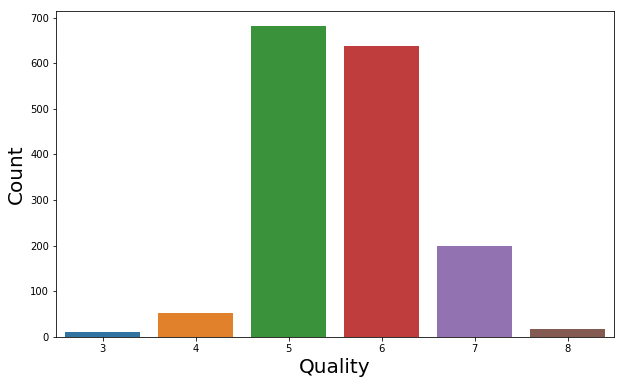

In [52]:
# Get the rating count 
plt.figure(figsize=(10,6))
sns.countplot(x='quality', data=wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Count').set_size(20)

**Analysis:** As expected, the rating count follows a normal distributed curve with most of the ratings in the middle between 5 and 6, and the rest scattered on the fringes.

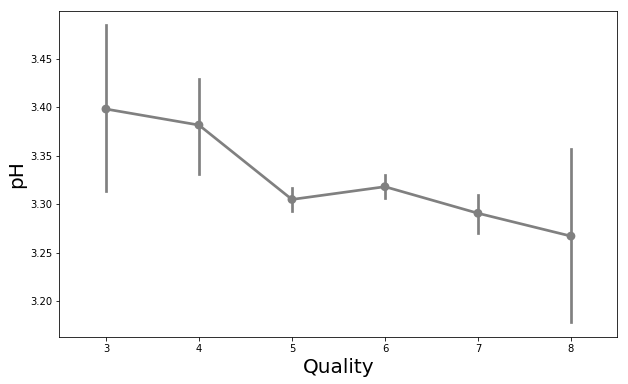

In [53]:
plt.figure(figsize=(10,6))
sns.pointplot(wine['quality'],wine['pH'], color='grey')
plt.xlabel('Quality').set_size(20)
plt.ylabel('pH').set_size(20)

**Analysis:** We can infer that higher quality wines have a comparatively low pH/high Acidity

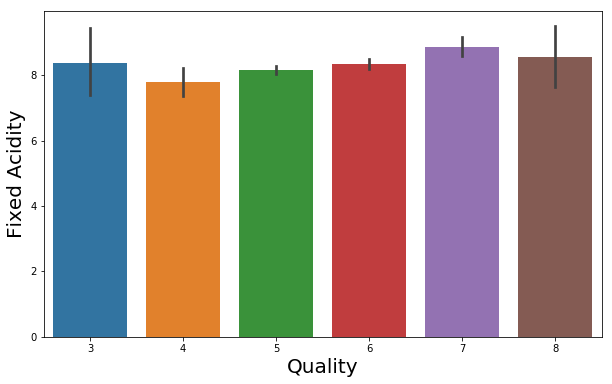

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Fixed Acidity').set_size(20)

**Analysis:** Here we see that fixed acidity does not give any specification to classify the quality.

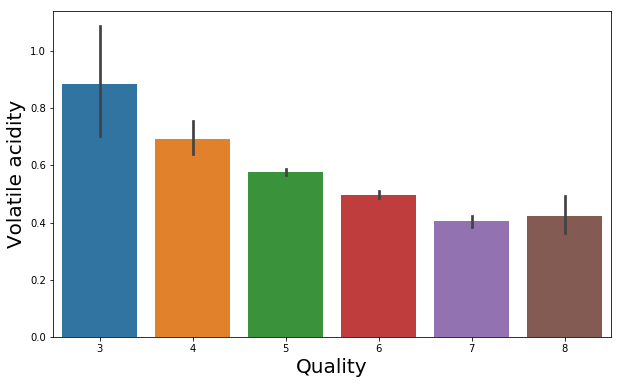

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Volatile acidity').set_size(20)

**Analysis:** Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

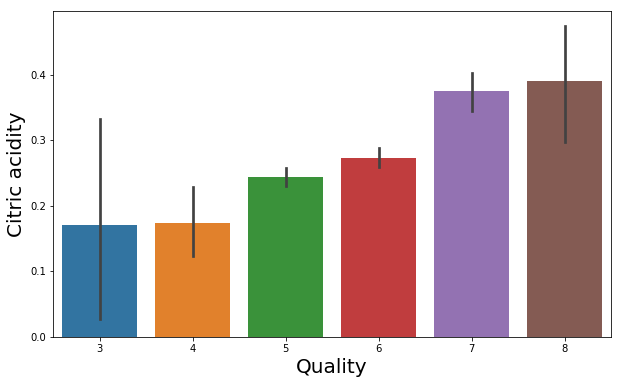

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Citric acidity').set_size(20)

**Analysis:** Composition of citric acid go higher as we go higher in the quality of the wine

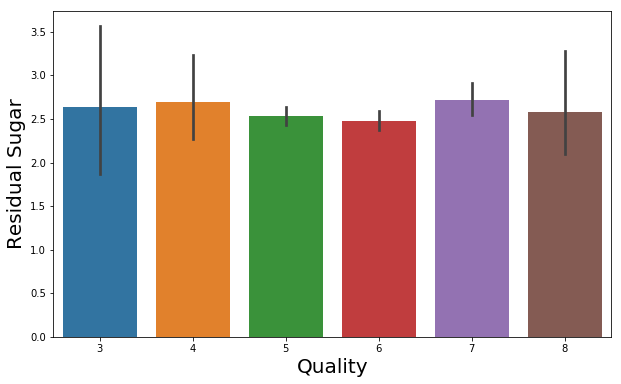

In [57]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Residual Sugar').set_size(20)

**Analysis:** Residual sugar seems to have little affect on the quality of the wine

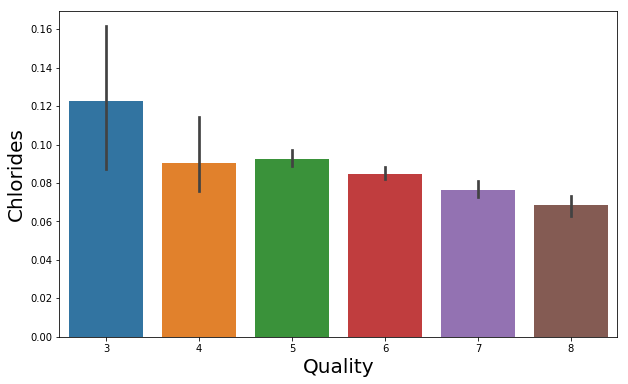

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Chlorides').set_size(20)

**Analysis:** Composition of chloride also go down as we go higher in the quality of the wine

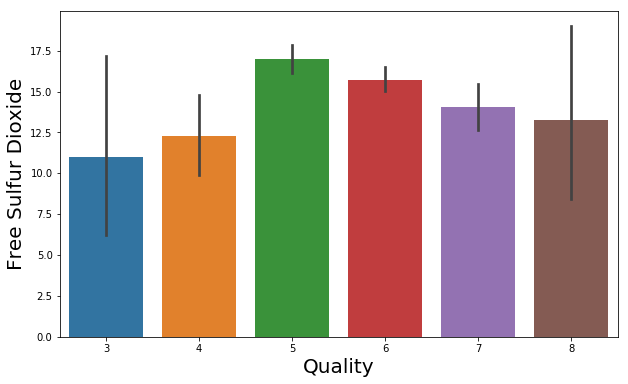

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Free Sulfur Dioxide').set_size(20)

**Analysis:** Free sulfur dioxide seems to gradually increase with the quality of the wine

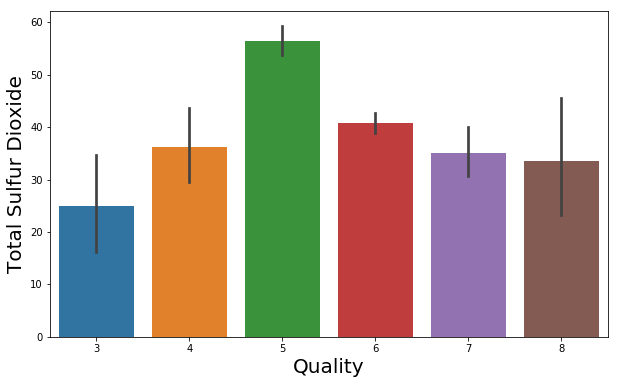

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Total Sulfur Dioxide').set_size(20)

**Analysis:** Total sulfur dioxide seems to gradually increase with the quality of the wine

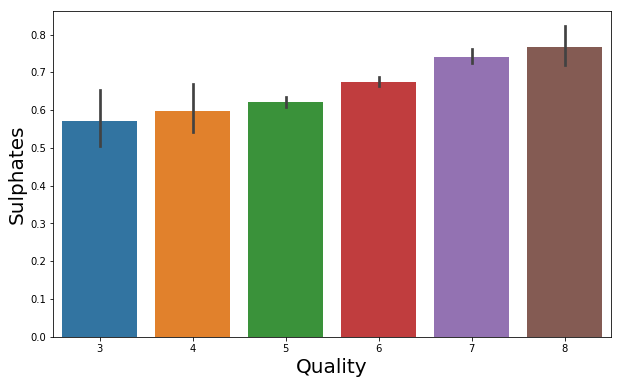

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Sulphates').set_size(20)

**Analysis:** Sulphates level goes higher with the quality of wine

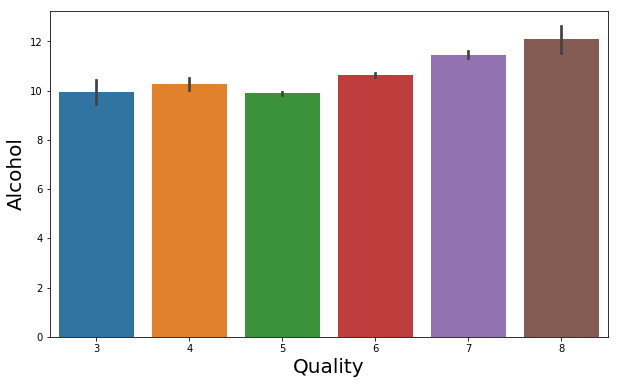

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Alcohol').set_size(20)

**Analysis:** Alcohol level also goes higher as te quality of wine increases

# Prep the Data <a class="anchor" id="3-bullet"></a>

Now that we have a good idea of the relationship between the attributes of wine to the quality ranking of the wine, we can begin to prep the data for modeling. 

Making binary classificaion for the response variable.
Dividing wine as good and bad by giving the limit for the quality

In [63]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [64]:
# Assign a labels to our quality variable
label_quality = LabelEncoder()

In [65]:
# Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [66]:
# Get the counts of 0 and 1 quality 
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

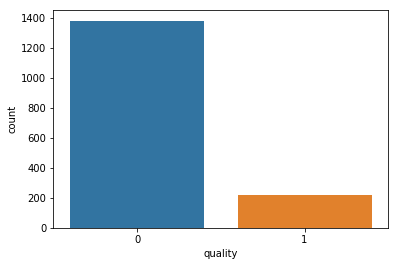

In [67]:
# Graph that quality 
sns.countplot(wine['quality'])

In [68]:
# Check again if there are any null values in the dataset 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Training And Testing Data  <a class="anchor" id="4-bullet"></a>

In [69]:
# Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [70]:
# Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
# Import Standard scaling 
sc = StandardScaler()

In [72]:
# Applying Standard scaling to get optimized result
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training Models and Predicting the Test Data  <a class="anchor" id="5-bullet"></a>

## Random Forest  <a class="anchor" id="5.1-bullet"></a>

<b>Reference: </b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<b>Definition:</b>
- Random Forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees

<b>Advantages:</b>
- It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier.
- It runs efficiently on large databases.
- It can handle thousands of input variables without variable deletion.
- It gives estimates of what variables are important in the classification.

<b>Disadvantages:</b>
- Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.
- For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.

In [73]:
rfc = RandomForestClassifier(n_estimators = 250)

In [74]:
# Fit linear model with Random Forest
# X_train: Training data
# y_train: Target values
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
# Predict the class labels for samples in X_test
pred_rfc = rfc.predict(X_test)

In [76]:
# Print the classification report 
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93       273
          1       0.63      0.36      0.46        47

avg / total       0.86      0.88      0.86       320



<b>Random forest gives the accuracy of 87%</b>

## Stochastic Gradient Decent <a class="anchor" id="5.2-bullet"></a>

<b>Reference: </b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

<b>Definition:</b>
- This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.
- This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

<b>Advantages:</b>
- (Sometimes) faster convergence: The high througput may also translate to faster convergence depending on the variance in the dataset and the learning rate used.
- High quality gradient: Mini batching allows for a high quality gradient and this will be really useful allowing one to use high learning rates.

<b>Disadvantages:</b>
- Low final accuracy: Many times mini batching may result in low final accuracy since the noise in the gradient is really helpful towards the end to extract that last 0.5%.

In [77]:
# Import the SGDC Classifier 
sgd = SGDClassifier(max_iter=4, penalty=None)

In [78]:
# Fit linear model with Stochastic Gradient Descent 
# X_train: Training data
# y_train: Target values
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=4, n_iter=None,
       n_jobs=1, penalty=None, power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [79]:
# Predict the class labels for samples in X_test
pred_sgd = sgd.predict(X_test)

In [80]:
# Print the classification report 
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.92      0.86      0.89       273
          1       0.41      0.55      0.47        47

avg / total       0.84      0.82      0.83       320



<b>84% accuracy using stochastic gradient descent classifier</b>

## Support Vector Machine <a class="anchor" id="5.3-bullet"></a>

<b>Reference: </b> https://scikit-learn.org/stable/modules/svm.html

<b>Definition:</b>
- Are a set of supervised learning methods used for classification, regression and outliers detection.

<b>Advantages:</b>
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels

<b>Disadvantages:</b>
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [81]:
# Import the SGDC Classifier 
svc = SVC()

In [82]:
# Fit linear model with Support Vector Machine 
# X_train: Training data
# y_train: Target values
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
# Predict the class labels for samples in X_test
pred_svc = svc.predict(X_test)

In [84]:
# Print the classification report 
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320



<b>Support vector classifier gets 86%</b>

## Confusion Matrices 

### Confusion Matrix for Random Forest

In [85]:
# sklearn.metrics.confusion_matrix
# y_test: Ground truth (correct) target values.
# pred_rfc: Estimated targets as returned by a classifier.
cnf_matrix = confusion_matrix(y_test, pred_rfc)

Confusion matrix, without normalization
[[263  10]
 [ 30  17]]


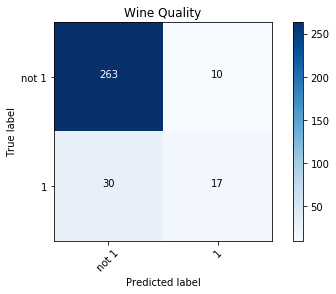

In [86]:
# Confusion matrix for the random forest classification
plot_confusion_matrix(cnf_matrix, classes=['not 1','1'], title='Wine Quality')

**What did we learn from this matrix?**
- There are two possible predicted classes: 0(bad) and 1(good). If we were predicting the quality of a wine, for example, "0" would mean the wine was not very good, and "1" would mean the quality of the wine was quite good.
- The classifier made a total of 320 predictions
- Out of those 320 cases, the classifier predicted "1" 47 times, and "no" 273 times.

### Confusion Matrix for SGD

In [87]:
cnf_matrix = confusion_matrix(y_test, pred_sgd)

Confusion matrix, without normalization
[[235  38]
 [ 21  26]]


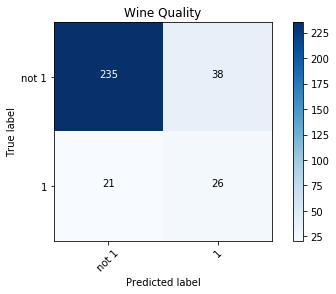

In [88]:
# Confusion matrix for the stochastic gradient decent classifier
plot_confusion_matrix(cnf_matrix, classes=['not 1','1'], title='Wine Quality')

**What did we learn from this matrix?**
- There are two possible predicted classes: 0(bad) and 1(good). If we were predicting the quality of a wine, for example, "0" would mean the wine was not very good, and "1" would mean the quality of the wine was quite good.
- The classifier made a total of 320 predictions
- Out of those 320 cases, the sgd predicted "1" 47 times, and "no" 273 times.
- However, confusion matrix has less True negatives (220 vs 266) with more True positives (21 vs 35)   

### Confusion Matrix for Support Vector Machine

In [89]:
cnf_matrix = confusion_matrix(y_test, pred_svc)

Confusion matrix, without normalization
[[268   5]
 [ 35  12]]


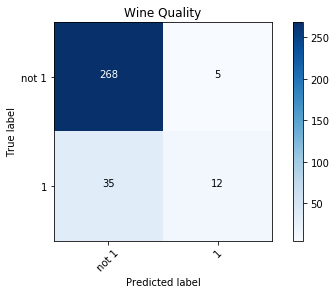

In [90]:
# Confusion matrix for the random forest classification
plot_confusion_matrix(cnf_matrix, classes=['not 1','1'], title='Wine Quality')

**What did we learn from this matrix?**
- There are two possible predicted classes: 0(bad) and 1(good). If we were predicting the quality of a wine, for example, "0" would mean the wine was not very good, and "1" would mean the quality of the wine was quite good.
- The classifier made a total of 320 predictions
- Out of those 320 cases, the classifier predicted "1" 47 times, and "no" 273 times.

## Receiver Operating Characteristic (ROC) Curve

### ROC Curve for Random Forest 

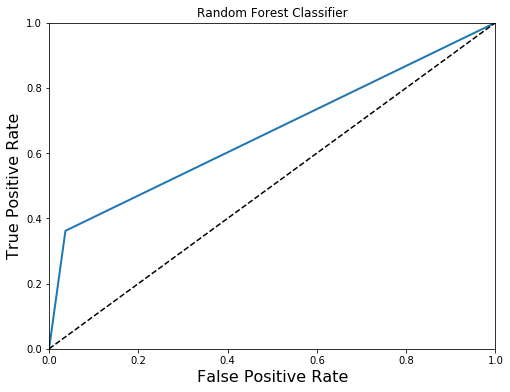

In [91]:
# Get the ROC Curve for RFC
fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title("Random Forest Classifier")
plt.show()

In [92]:
roc_auc_score(y_test, pred_rfc)

0.6625360455147689

**What did we learn from the ROC Curve for Random Forest?**
- By looking at the shape of the ROC curve, we can evaluate that towards the bottom of left corner where the grpah is closet to the random line, the model is missclassifying at X=0. The curve stables out as it goes higher which indicates that out model is stable. 

### ROC Curve for SGDC

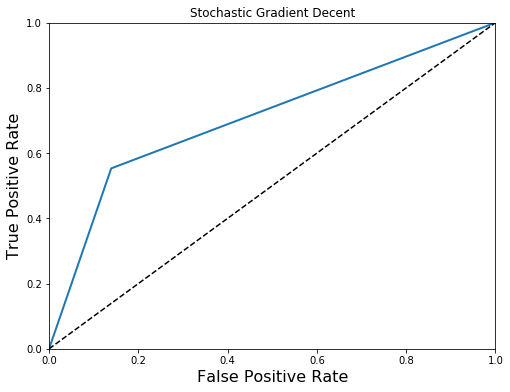

In [93]:
# Get the ROC Curve for SGDC
fpr, tpr, thresholds = roc_curve(y_test, pred_sgd)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title("Stochastic Gradient Decent")
plt.show()

In [94]:
roc_auc_score(y_test, pred_sgd)

0.7069986750837816

**What did we learn from the ROC Curve for SGDC?**
- By looking at the shape of the ROC curve, we can evaluate that the curve starts out between the y axis and the random line and then stables out as it goes up. We can see that the model is less stable then the Random Forest ROC by a fraction, as the two scores are almost identical. 

### ROC Curve for Support Vector Machine

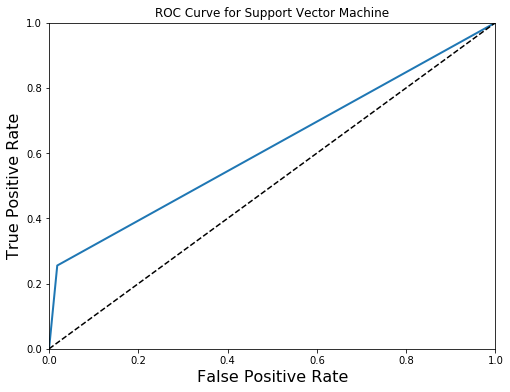

In [95]:
# Get the ROC Curve for SVC
fpr, tpr, thresholds = roc_curve(y_test, pred_svc)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title("ROC Curve for Support Vector Machine")
plt.show()

In [96]:
roc_auc_score(y_test, pred_svc)

0.6185020653105758

**What did we learn from the ROC Curve for SVC?**
- By looking at the shape of the ROC curve, we can evaluate the ROC Curve is less stable than the prior two models with a score of .61 compared to .69. 

## Which model yields the best performance measure?

In [97]:
comparison = pd.DataFrame({'models': ["SVC","Random Forest","Stochastic Gradient Decent Classifier"],
                           'accuracies': [accuracy_score(y_test, pred_svc), accuracy_score(y_test, pred_rfc), accuracy_score(y_test, pred_sgd)]})

In [98]:
comparison

,accuracies,models
0,0.875000,SVC
1,0.875000,Random Forest
2,0.815625,Stochastic Gradient Decent Classifier


We can see Random Forest model has the best accurary ratio for predicting our wine quality. SVC and SGDC were not as accurate as Random Forrest but their results were not bad. Between the two of them their results were very close to each other. 

# Ranking Feature Importance  <a class="anchor" id="6-bullet"></a>

Now that we have found our most accurate model (Random Forest), we want to find which features are the most important when determining the quality of data. 

In [99]:
rfc = RandomForestClassifier(n_estimators=200)

In [100]:
# fit the data to the classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
# create the feature importance dataframe 
feature_importances = pd.DataFrame(rfc.feature_importances_, index = X.columns, columns=
                                   ['importance']).sort_values('importance', ascending=False)

In [102]:
# Output the feature importance 
feature_importances

,importance
alcohol,0.170088
sulphates,0.122062
volatile acidity,0.114411
density,0.088767
citric acid,0.085934
total sulfur dioxide,0.081042
chlorides,0.075016
fixed acidity,0.069651
residual sugar,0.068295
pH,0.062603


# Analysis

After analyzing the feature importance ranking, I personally believe that it is accurate. The alcohol content of wine is going to have a huge affect on the quality because ultimatley that is why people choose to consume wine. 

# Present Solution <a class="anchor" id="7-bullet"></a>

Wine providers who are looking to increase revenue with their white wine stock may want to take a look at the alcohol percentage of their white wine. Most likely it is lower than their competors and would make sense why their profits are lower. Most of the other chemical components do not play a factor on whether a wine consumer will like the drink.  

# Final Paper <a class="anchor" id="8-bullet"></a>

### History of Python  <a class="anchor" id="8.1-bullet"></a>

Python, which has been ranked one of the top ten programming languages since 2003, was conceived back in the 1980s by a man named Guido van Rossum. Since then may changes have occurred within the language. Python 2.0 was released in the year 2000. Major functions that Python 2 focused on were cycle-detection and the support for Unicode. The latest version of Python 2 is Python 2.7 which came out in 2010. Separately, Python 3 was launched in December of 2008 and it’s latest version is Python 3.5. There are significant differences between Python 2 and Python 3, which is why by the year 2020 Python 2 will have expired and why Python 3 is referred to as the future of Python. 

### Multiple Paradigms <a class="anchor" id="8.2-bullet"></a>

Python supports four main coding styles which makes Python a flexible programming language. Rather than using on one coding style, each different coding style is suited for a particular problem. We will explore the different paradigms here: 

*Object-oriented programming*<br>
Python doesn’t fully support this coding style because it does not implement features such as encapsulation, however when used, data fields are treated as objects and code can be reused. An example of object-oriented programming with Python would be using a data structure such as a list and turning it into an instance of a class. The class can keep track of the properties of the data inside the list. 

*Structured Programming(Procedural programming)* <br>
Python does very well implementing this coding style which requires that tasks are treated as iterations. This functionality breaks code into pieces that allow the developer to examine each piece easily. 

*Functional Programming (this is what our project is)* <br>
We will explore the functional programming style further with our own data, but, a quick overview of functional programming is that everything is treated like a math equation with this coding style. It also supports package imports that provide access to higher-order functions. 

*Aspect-oriented Programming* <br>
Known as the horizontal programming paradigm, Python fully implements this paradigm. Within this programming language, type of behaviors are applied to several classes that don’t necessarily share the same object-oriented inheritance. 


## The Elements of Python <a class="anchor" id="9-bullet"></a>

### Reserved Words <a class="anchor" id="9.1-bullet"></a>

Keywords are the reserved words in Python. Keywords cannot be used as a variable name, function name or any other identifier. They are used to define the syntax and structure of the Python language. In Python, keywords are case sensitive. There are 33 keywords in Python. This number will vary slightly in course of time as Python continues to be updated. All the keywords except True, False and None are in lowercase and they must be written as it is. The list of all the keywords are given below.

In [103]:
 data = [["False","class","finally", "is", "return"],
         ["None","continue","for", "lambda", "try"],
         ["True","def","from", "nonlocal", "while"],
         ["and", "del", "global", "not", "with"],
         ["as", "elif", "if", "or", "yield"],
         ["assert", "else", "import", "pass", "break"],
         ["except", "in", "raise"]
         ]
print("Keywords in Python")
display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Keywords in Python


**Example:**<br>
An example of the keyword def, which is used to create functions in Python 


In [104]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

Here, we are using the keyword def to create a function named plot_roc_curve, which we can reference in our program to plot a roc curve. 

## Data Types <a class="anchor" id="9.2-bullet"></a>
Python supports type inferencing which is a process for automatic detection of the type of the data, so the keywords that are used for creating data types in most of the programming languages (int, float, boolean) are not required in Python.

In programming languages, a data structure is a way of organizing and structuring pieces of data, and a data type is just a piece of data. Data structures can be divided into two categories: primitive and non-primitive data structures. 

### Primitive
Primitive data structures are the simplest forms of representing data hence the name "primitive", where the non-primitive structures are designed to organize and manage sets of primitive data. In Python, there are four primitive data types available:

1) **Integers** <br>
2) **Float** <br>
3) **Strings** <br>
4) **Boolean** <br>

### Integers
Just as in mathematics (where it is referred to as a signed integer) an integer is a whole number that could hold a zero, positive or negative value. This is how you would create various integers in Python

**Example:**

In [105]:
# positive number
number = 10

# negative number
negative_number = -10

zero = 0

### Float
Float represents real numbers, a data type that is used to define floating decimal points. These are some examples of float numbers in Python

**Example:**

In [106]:
decimal_number = 10.5

decimal_number_two = -15.88

### String
String represents a sequence of characters (text) inside double or single quotes. In Python, strings are immutable so once it's declared the value can't be changed, instead a new object is created. 

**Example:**

In [107]:
# Declare a string variable named string example and set the value to "Hello World"
string_example = "Hello World"

# Create a new string named second_string and set the value equal to that of the string example
second_string = string_example

# Print the string 
print(second_string)

Hello World


### Boolean
Booleans are used to represent truth values with two constant objects True and False. The  built-in function for converting an object to Boolean is bool()

**Example:**

In [108]:
# Returns True since Boolean in numeric can be present as 0 or 1
num = 1
print(bool(num))

True


## Structured Types <a class="anchor" id="9.3-bullet"></a>
There are four built-in data structures in Python - list, tuple, dictionary and set. We will see how to use each of them and how they make life easier for us.

### List 
A _list_ is a data structure that holds an ordered collection of items you can store a sequence of items in a list. This is easy to imagine if you can think of a shopping list where you have a list of items to buy, except that you probably have each item on a separate line in your shopping list whereas in Python you put commas in between them.

The list of items should be enclosed in square brackets so that Python understands that you are specifying a list. Once you have created a list, you can add, remove or search for items in the list. Since you can add and remove items,  a list is a _mutable_ data type (can be altered).

**Example:**

In [109]:
# Example of Lists 
shoplist = ['apple', 'orange', 'Lemon', 'banana']

print('I have', len(shoplist), 'items to purchase.')

print('These items are:', end=' ')

for item in shoplist:
    print(item, end=' ')

I have 4 items to purchase.
These items are: apple orange Lemon banana 

### Tuple 
Tuples are used to hold together multiple objects. Think of them as similar to lists, but without the extensive functionality that the list class gives you. One major feature of tuples is that they are _immutable_ like strings.

Tuples are defined by specifying items separated by commas within an optional pair of parentheses.

Tuples are usually used in cases where a statement or a user-defined function can safely assume that the collection of values (i.e. the tuple of values used) will not change.

**Example:**

In [110]:
zoo = ('Lion', 'elephant', 'Falcon')
print('Number of animals in the zoo is', len(zoo))

Number of animals in the zoo is 3


### Dictionary 
A dictionary is like an address-book where you can find the address or contact details of a person by knowing only his/her name (associate keys (name) with values (details)). The key must be unique. 

You also can use only immutable objects (like strings) for the keys of a dictionary but you can use either immutable or mutable objects for the values of the dictionary. This basically translates to say that you should use only simple objects for keys.

**Example:**

In [111]:
ab = {
    'Email': '12345@gmail.com',
    'First_Name': 'Fatih', 
    'Last_Name': 'Agirtmis'
}

print("Contact", ab['Email'])

Contact 12345@gmail.com


### Sequence (Arrays)
Lists, tuples and strings are examples of sequences, but what are sequences and what is so special about them? The major features are membership tests, (the in and not in expressions) and indexing operations, which allow for fetching a particular item in the sequence directly.

The three types of sequences mentioned above - lists, tuples and strings, also have a slicing operation which allows us to retrieve a slice of the sequence.

**Example:**

In [112]:
shoplist = ['apple', 'orange', 'Lemon', 'banana']

# indexing 
print('Item 0 is', shoplist[0])
print('Item 1 is', shoplist[1])
print('Item 2 is', shoplist[2])
print('Item 3 is', shoplist[3])

Item 0 is apple
Item 1 is orange
Item 2 is Lemon
Item 3 is banana


# Syntax of Python <a class="anchor" id="10-bullet"></a>

## Lines and Indentation <a class="anchor" id="10.1-bullet"></a>
Python provides no braces to indicate blocks of code for class, function, and flow control definitions. Instead, blocks of code are denoted by line indentation, which is rigidly enforced. The number of spaces in the indentation varies, but all statements within the block must be intended the same amount. 

**Example:**

In this example, we have created a function named plot_confusion_matrix that can be called to plot confusion matrices. Every statement within the function has to be indented once. Within the function there is an if statement that checks if normalized has been flagged. Every line within the if statement has to be indented in order to keep the calls in scope. 

In [113]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

## Multi-Line Statements <a class="anchor" id="10.2-bullet"></a>

In Python, statements typically end with a new line. However, Python does allow the use of the line continuation character (\) to denote that line should continue. 

**Example:**

Statements contained within the [], {}, or () brackets do not need to use the line continuation character.

In [114]:
item_one = 'apple '
item_two = 'banana '
item_three = 'peach'

total = item_one + \
        item_two + \
        item_three
        
print(total)

apple banana peach


## Quotations <a class="anchor" id="10.3-bullet"></a>

Python accepts both single (‘), double (“”), or triple (‘’’ or “””) quotes to denote string literals, so long as the same type of quote starts and ends the string.

**Example:**

In [115]:
word = 'word'
sentence = 'This is a sentence.'
paragraph = """This is a paragraph. It is
made up of multiple lines and sentences."""

## Comments <a class="anchor" id="10.4-bullet"></a>

A hash sign (#) that is not inside a string literal begins a comment in Python. All the characters after the # and up to the end of the statement are part of the comment. The Python interpreter will then ignore the statement. 

**Example:**

In [116]:
# This is a comment.

# Control Abstractions <a class="anchor" id="11-bullet"></a>

One of the main purposes of a programming language is abstraction. Abstraction is the idea of hiding certain information or techniques from the user. The idea behind this is to reduce complexity and allow for efficient implementation and design of computer programs and software. 

A statement in python such as: a = b*c; seems simple enough (multiply b times c and assign that value to a) but in the realm of computer science this is a much more complex idea. You first have to convert all of the variables and numbers to binary, which then uses assembly instructions to perform the operations. Then you have to get the memory locations for each of the variable and make sure that whatever value is stored in ‘a’ is available for use later on in the program. This sounds fairly simple but this is only so due to abstraction. We do not see the instructions that take place “behind the scenes”. Without this abstraction, a programmer would have to specify all binary-level/register assignment operations every time they wanted to multiply a couple numbers together. Abstraction reduces if not eliminates the need for all of the additional code and steps a programmer would need to do in order to complete the operation desired.

In Python this idea of abstraction and control can be seen in quite a few areas. One such area would be in the use of loops. While in Java, JavaScript, C, C++ all use for and while loops in an arithmetic expression, Python iterates through items of a sequence.  The method “range” on the other hand generates an arithmetic progression. A for loop is a statement that can control the flow of a program by allowing iteration over certain sections of the code. Instead of having repetitive code, you can have a for loop that will repeat a certain action a number of times that is set in the loop. For example if you wanted to print information to the user a set number of times, you can use a for loop to determine how many times this action will be performed. Another example of control statements in Python would be the use of a while loop. A while loop is a tool that can be used to test if a condition is true and it is executed as long as it is true.


# Evaluation of Python <a class="anchor" id="12-bullet"></a>

## Readability and Writability  <a class="anchor" id="12.1-bullet"></a>

Writability refers to how easy it is to write and to create programs. Readability is the concept of how easy or difficult it is to read and understand a language. Python is a high readability and writability programming language which is another reason for why Python remains a top programming language. Perl, Java, C, C++ and JavaScript use symbols and tokens while Python explicitly uses variables that the developers need to understand what the code does, nothing extra. Python also uses English words such as “replace” “read” and phrases such as “for ___ in ___” which leave no room to question what the code is trying to do in the procedure. 

**Example:**

In [117]:
print("Hello World")

Hello World


While in the example above, Python just calls the method print and inputs the word to print in the parenthesis. 
For flow control, code blocks are separated by indentation instead of curly braces which makes code easier to read and write as well. Programming languages such as Java, JavaScript, C and C++ all separate code using curly braces causing a worry about matching curly braces which causes silly errors. Python eliminates this completely. All of these factors help programmers write code in fewer words and fewer steps. 


### Strengths of Python <a class="anchor" id="12.2-bullet"></a>
- Access to large standard libraries. 
- The ability to process XML and run on all modern operating systems. 
- Improves programmers productivity due to simple syntax and readability.
- Easier to maintain.
- Less time to develop compared to Java, C++, JavaScript… 
- Multi-paradigm approach. Flexibility in coding styles.

### Weaknesses of Python 
- Not as fast as a compiler language. Slow in execution. 
- Errors only show up at runtime.
- Not present in Web application or Mobile application. 
